
Results for n = 2:
Expected out-of-sample error: 0.5297
Bias component: 0.2881
Variance component: 0.2416

Results for n = 20:
Expected out-of-sample error: 0.2192
Bias component: 0.2045
Variance component: 0.0147


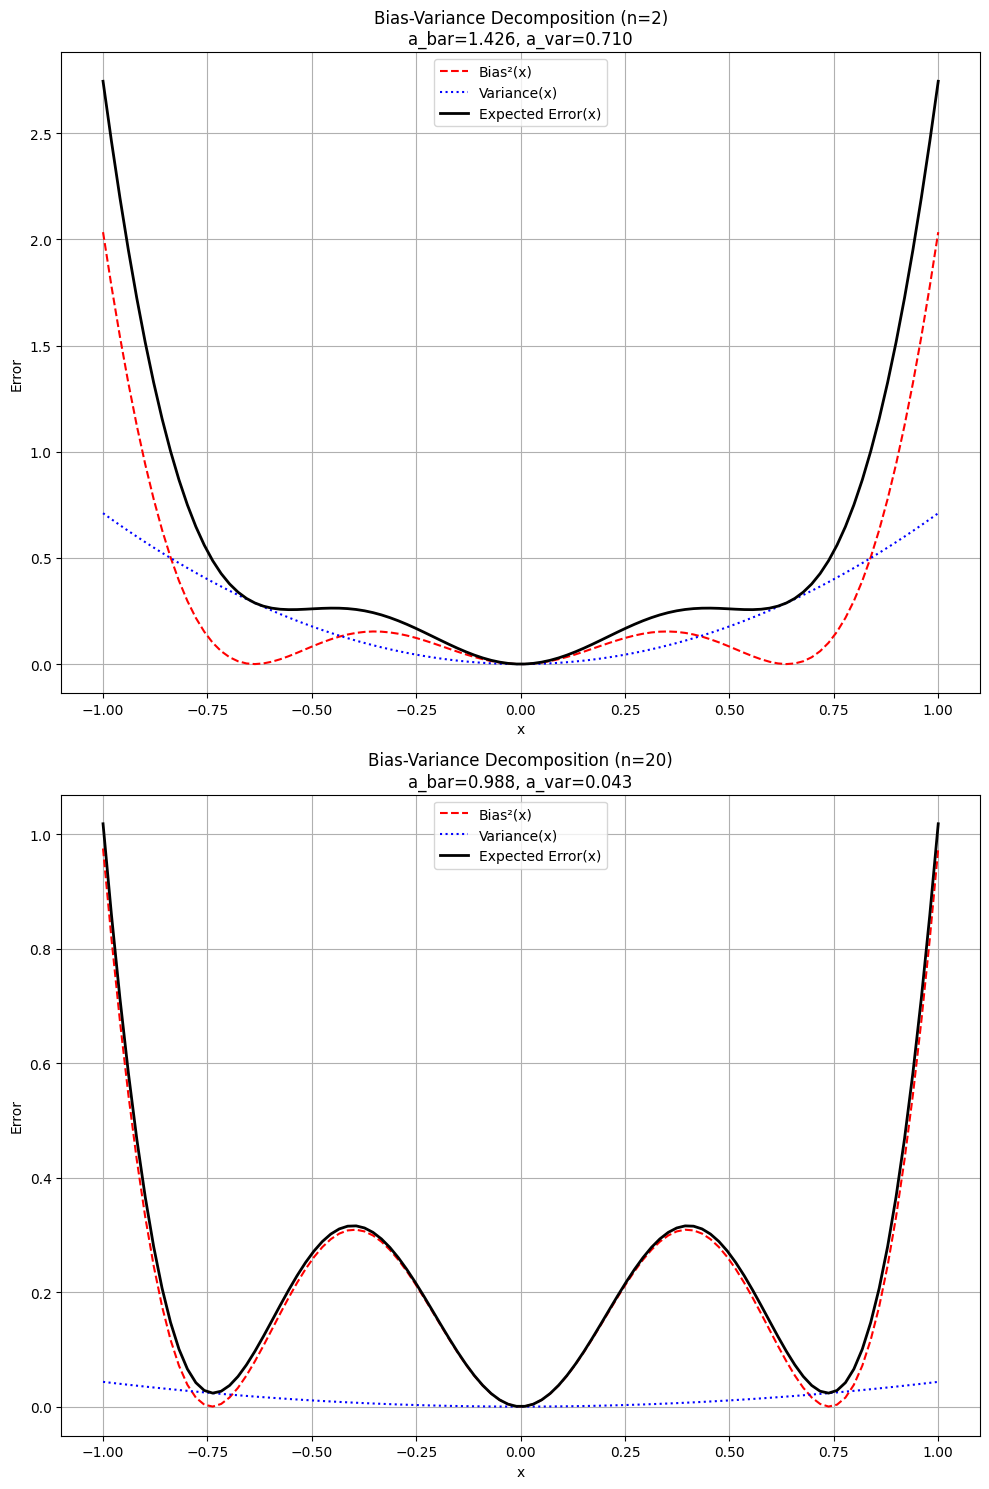

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def gen_sindata(n):
    x = stats.uniform(-1, 2)
    v = x.rvs((n, 1))
    y = np.sin(np.pi * v)
    return (v, y)

points = [2, 20]
results = {}

fig, axs = plt.subplots(2, 1, figsize = (10, 15))

for idx, n in enumerate(points):
    lr = LinearRegression(fit_intercept=False)
    
    cnt = 100000
    a_out = []
    for i in range(cnt):
        X, y = gen_sindata(n)
        lr.fit(X, y)
        a_out.append(lr.coef_[0, 0])
    
    a_bar = np.mean(a_out)
    a_var = np.var(a_out)
    
    xi = np.linspace(-1, 1, 100)
    yi = np.sin(np.pi * xi)
    
    axs[idx].plot(xi, (a_bar * xi - yi)**2, '--r', label='Bias²(x)')
    axs[idx].plot(xi, (a_var) * (xi)**2, ':b', label='Variance(x)')
    axs[idx].plot(xi, ((a_bar * xi - yi)**2 + a_var * (xi)**2), '-k', lw=2, label='Expected Error(x)')
    axs[idx].legend()
    axs[idx].set_xlabel('x')
    axs[idx].set_ylabel('Error')
    axs[idx].set_title(f'Bias-Variance Decomposition (n={n})\na_bar={a_bar:.3f}, a_var={a_var:.3f}')
    axs[idx].grid(True)
    
    bias = np.mean((a_bar * xi - yi)**2)
    variance = a_var * np.mean(xi**2)
    expected_error = bias + variance
    
    results[n] = {
        'a_bar': a_bar,
        'a_var': a_var,
        'bias': bias,
        'variance': variance,
        'expected_error': expected_error
    }
    
    print(f"\nResults for n = {n}:")
    print(f"Expected out-of-sample error: {expected_error:.4f}")
    print(f"Bias component: {bias:.4f}")
    print(f"Variance component: {variance:.4f}")

plt.tight_layout()
plt.savefig('bias_variance_comparison.png')
plt.show()

# print("\nComparison:")
# for key in results[2].keys():
#     diff = results[20][key] - results[2][key]
#     print(f"{key}: {diff:.4f} (20 points - 2 points)")

lr.coef = [[2.06697702]]


C:\Users\JUN-MING-WU\AppData\Local\Temp\ipykernel_10972\2837149461.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('$a=%3.3g$' % (lr.coef_), fontsize = 16)


Text(0.5, 1.0, '$a=2.07$')

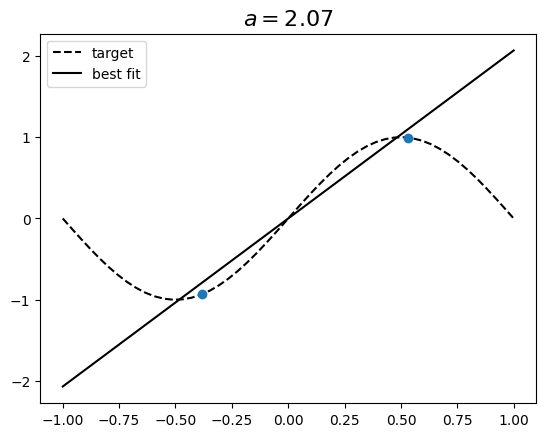

In [5]:
import numpy as np
from scipy import stats


def gen_sindata(n = 2):
    x = stats.uniform(-1, 2) # define random variable
    v = x.rvs((n, 1)) # generate sample
    y = np.sin(np.pi * v) # use sample for sine
    return (v, y)

from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = False)
X, y = gen_sindata(2)
lr.fit(X, y)
print("lr.coef =", lr.coef_)

%matplotlib inline
import matplotlib.pyplot as plt
xi = np.linspace(-1, 1, 50)
yi = np.sin(np.pi * xi)
y_pred = lr.predict(xi.reshape(-1, 1))

plt.plot(xi, yi, '--k', label = 'target')
plt.plot(X, y, 'o')
plt.plot(xi, y_pred, c = 'k', label = 'best fit')
plt.legend(loc = 'best')
plt.title('$a=%3.3g$' % (lr.coef_), fontsize = 16)

a_bar =  1.4286808038813905
a_var =  0.7078547431467332
a_var2 =  0.7078547431467361


Text(0.5, 1.0, '$a_{bar}=1.43$, $a_{var}=0.708$')

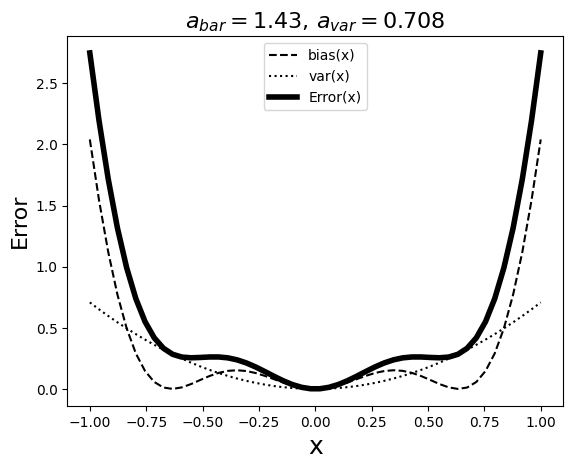

In [6]:
cnt = 100000
#cnt = 1000
a_out = [] # output container

for i in range(cnt):
    X, y = gen_sindata(2)
    lr.fit(X, y)
    y_pred = lr.predict(xi.reshape(-1, 1))
    a_out.append(lr.coef_[0, 0])
a_bar = np.mean(a_out) # approx 1.43
a_var = np.var(a_out) # approx 0.71

print("a_bar = ", a_bar)
print("a_var = ", a_var)


# confirm the variance
vsum = 0
for i in range(cnt):
    vsum += (a_out[i] - a_bar) ** 2
a_var2 = vsum / cnt

print ("a_var2 = ", a_var2)


xi = np.linspace(-1, 1, 50)
yi = np.sin(np.pi * xi)

plt.plot(xi, (a_bar * xi - yi) ** 2, '--k', label = 'bias(x)')
plt.plot(xi, (a_var) * (xi) ** 2, ':k', label = 'var(x)')
plt.plot(xi, ((a_bar * xi - yi) ** 2 + a_var * (xi) ** 2), '-k', lw = 4, label = 'Error(x)')
plt.legend(loc = 'best')
plt.xlabel('x', fontsize = 18)
plt.ylabel('Error', fontsize = 16)
plt.title('$a_{bar}=%3.3g$, $a_{var}=%3.3g$' % (a_bar, a_var), fontsize = 16)

In [7]:
# compute bias and variance
cnt = 1000000
bias = 0
var = 0
x = np.random.uniform(-1, 1, size = cnt)
for i in range(cnt):
    bias += (a_bar * x[i] - np.sin(np.pi * x[i])) ** 2
    var += a_var * x[i] * x[i]
bias = bias / cnt # approx 0.271
var = var / cnt # approx 0.237
print(f'bias = {bias:.3f}, var = {var:.3f}')

bias = 0.271, var = 0.236


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = False)
X, y = gen_sindata(2)
lr.fit(X, y)
lr.coef_

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
xi = np.linspace(-1, 1, 50)
yi = np.sin(np.pi * xi)
y_pred = lr.predict(xi.reshape(-1, 1))

plt.plot(xi, yi, '--k', label = 'target')
plt.plot(X, y, 'o')
plt.plot(xi, y_pred, c = 'k', label = 'best fit')
plt.legend(loc = 'best')
plt.title('$a=%3.3g$' % (lr.coef_), fontsize = 16)

In [4]:
cnt = 100000
#cnt = 1000
a_out=[] # output container
for i in range(cnt):
    X, y = gen_sindata(2)
    lr.fit(X,y)
    y_pred = lr.predict(xi.reshape(-1,1))
    a_out.append(lr.coef_[0,0])
a_bar = np.mean(a_out) # approx 1.43
a_var = np.var(a_out) # approx 0.71

In [ ]:
print (a_bar, a_var)

In [ ]:
# confirm the variance
vsum = 0
for i in range(cnt):
    vsum += (a_out[i] - a_bar) ** 2
a_var2 = vsum / cnt
print (a_var2)

In [ ]:
xi= np.linspace(-1,1,50)
yi= np.sin(np.pi*xi)

plt.plot(xi,(a_bar*xi-yi)**2,'--k',label='bias(x)')
plt.plot(xi,(a_var)*(xi)**2,':k',label='var(x)')
plt.plot(xi,((a_bar*xi-yi)**2 + a_var*(xi)**2),'-k',lw = 4, label='Error(x)')
plt.legend(loc='best')
plt.xlabel('x', fontsize=18)
plt.ylabel('Error',fontsize=16)
plt.title('$a_{bar}=%3.3g$, $a_{var}=%3.3g$'%(a_bar,a_var),fontsize=16)

In [ ]:
# compute bias and variance
cnt = 1000000
bias = 0
var = 0
x = np.random.uniform(-1, 1, size = cnt)
for i in range(cnt):
    bias += (a_bar*x[i] - np.sin(np.pi*x[i]))**2
    var += a_var * x[i] * x[i]
bias = bias / cnt # approx 0.271
var = var / cnt # approx 0.237
print(f'bias = {bias:.3f}, var = {var:.3f}')